# Exploratory Data Analysis
## Lesson1: Exploring categorical data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_comics = pd.read_csv('csv/comics.csv')
df_comics.head(10)

,name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
0,Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NaN,Living Characters,4043.0,Aug-62,marvel
1,Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NaN,Living Characters,3360.0,Mar-41,marvel
2,"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NaN,Living Characters,3061.0,Oct-74,marvel
3,"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NaN,Living Characters,2961.0,Mar-63,marvel
4,Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NaN,Living Characters,2258.0,Nov-50,marvel
5,Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NaN,Living Characters,2255.0,Nov-61,marvel
6,Reed Richards (Earth-616),Public,Good,Brown Eyes,Brown Hair,Male,NaN,Living Characters,2072.0,Nov-61,marvel
7,Hulk (Robert Bruce Banner),Public,Good,Brown Eyes,Brown Hair,Male,NaN,Living Characters,2017.0,May-62,marvel
8,Scott Summers (Earth-616),Public,Neutral,Brown Eyes,Brown Hair,Male,NaN,Living Characters,1955.0,Sep-63,marvel
9,Jonathan Storm (Earth-616),Public,Good,Blue Eyes,Blond Hair,Male,NaN,Living Characters,1934.0,Nov-61,marvel


In [7]:
df_comics['align'].unique()

array(['Good', 'Neutral', 'Bad', nan, 'Reformed Criminals'], dtype=object)

In [8]:
df_comics['align'].value_counts()

Bad                   9615
Good                  7468
Neutral               2773
Reformed Criminals       3
Name: align, dtype: int64

In [9]:
df_comics['id'].value_counts()

Secret     8698
Public     6994
No Dual    1788
Unknown       9
Name: id, dtype: int64

In [14]:
df_comics.loc[:,['align','id']].value_counts().reset_index().rename(columns={0:'total'}).sort_values('align')

,align,id,total
0,Bad,Secret,4493
3,Bad,Public,2172
7,Bad,No Dual,474
9,Bad,Unknown,7
1,Good,Public,2930
2,Good,Secret,2475
6,Good,No Dual,647
4,Neutral,Public,965
5,Neutral,Secret,959
8,Neutral,No Dual,390


In [15]:
pd.crosstab(df_comics['align'],df_comics['id'])

id,No Dual,Public,Secret,Unknown
align,,,,
Bad,474,2172,4493,7
Good,647,2930,2475,0
Neutral,390,965,959,2
Reformed Criminals,0,1,1,0


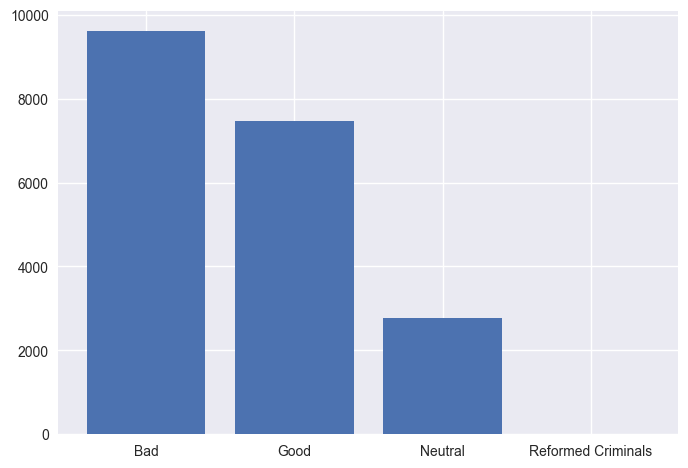

In [34]:
plt.style.use('seaborn-v0_8')
plt.bar(np.array(df_comics['align'].value_counts().index),df_comics['align'].value_counts())
plt.show()

<BarContainer object of 4 artists>

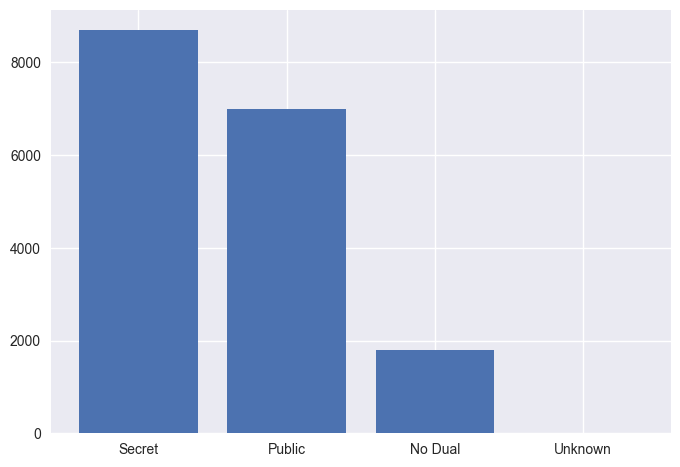

In [35]:
plt.bar(np.array(df_comics['id'].value_counts().index),df_comics['id'].value_counts())

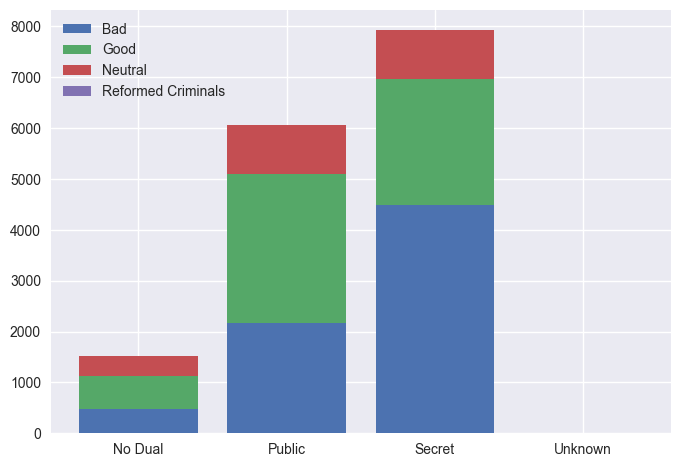

In [70]:
df_contingency = pd.crosstab(df_comics['align'],df_comics['id']).reset_index()
labels = df_contingency.loc[:,'No Dual':].columns
cats = df_contingency['align']
bottom = np.zeros(len(labels))
for cat in cats:
   #print(df_contingency.loc[df_contingency['align']==cat,labels])
   values = df_contingency.loc[df_contingency['align']==cat,labels].values[0]
   plt.bar(labels,values,label=cat,bottom=bottom)
   bottom += values
plt.legend()
#df_contingency.loc[df_contingency['align']=='Bad',labels]

## Lesson2: Exploring numerical data